# Praca domowa 5

## Wczytanie danych

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("../../clustering.csv", names=("x","y"))

## Sprawdzenie danych

In [3]:
data

,x,y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186
...,...,...
395,22.423142,50.252807
396,-58.534367,-78.679387
397,36.446549,-11.841887
398,-101.284845,85.096034


In [4]:
data.isna().sum().sum()

0

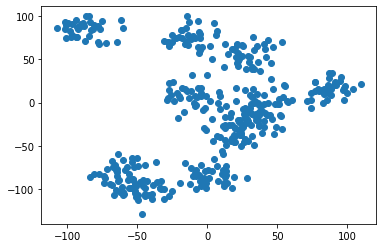

In [5]:
import matplotlib.pyplot as plt

plt.scatter(data["x"], data["y"])
plt.show()

"Na oko", można podejrzewać, że będzie od 4 do 8 klastrów.

## Funkcje plotujące klastry oraz obliczające optymalną ilość klastrów.

In [6]:
def plot_clusters(model, X, n_clusters):
    model = model(n_clusters=n_clusters, random_state=0)
    model.fit(X)
    y_model = model.predict(X)
    plt.scatter(X["x"], X["y"], c=y_model, s=30, cmap='viridis')

    centers = model.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.75)
    plt.show()

In [7]:
def count_wcss_scores(model, X, k_max):
    scores = []
    for k in range(1, k_max+1):
        modela = model(n_clusters=k, random_state=2137)
        modela.fit(X)
        wcss = modela.inertia_ # zwraca WCSS, a nie -1 * WCSS :> I DZIAŁA DLA KMEDOIDÓW
        scores.append(wcss)
    return scores

In [8]:
def plot_elbow(modelb, X, n_clusters):
    wcss_vec = count_wcss_scores(modelb, X, n_clusters)
    x_ticks = list(range(1, len(wcss_vec) + 1))
    plt.plot(x_ticks, wcss_vec, '-')
    plt.xlabel('k')
    plt.ylabel('Within-cluster sum of squares')
    plt.show()

In [9]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

In [10]:
from sklearn.metrics import silhouette_score

def plot_silhouette(model, X, n_max):
    cluster_num_seq = range(2, n_max)
    silhouette_vec = count_clustering_scores(X, cluster_num_seq, model, silhouette_score)
    plt.plot(cluster_num_seq, silhouette_vec, '-')
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.show()
    print("Najlepsza liczba:", silhouette_vec.index(max(silhouette_vec)) + 2) # dodajemy 2, bo zaczynamy od 2 
                                                                              # i indeksowanie jest od 0

## Tworzenie pierwszego modelu klasteryzacji - k-means

In [11]:
from sklearn.cluster import KMeans

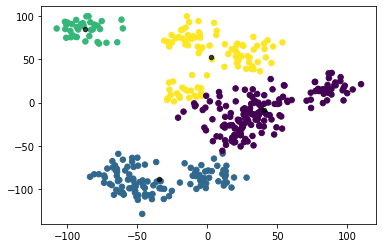

In [12]:
plot_clusters(KMeans, data, 4)

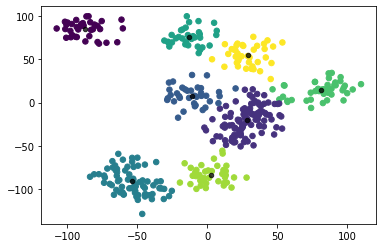

In [13]:
plot_clusters(KMeans, data, 8)

Rzeczywiście, wygląda to ładnie. Sprawdźmy jednak czy jest to optymalna liczba klastrów.

### Sprawdzanie optymalnej liczby klastrów

### Metoda łokcia

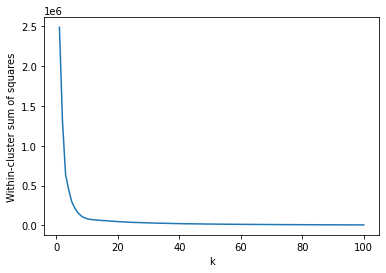

In [14]:
plot_elbow(KMeans, data, 100)

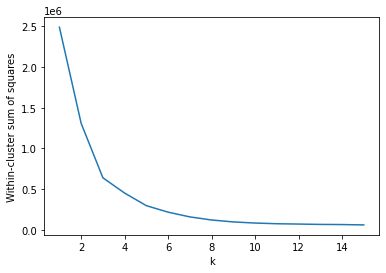

In [15]:
plot_elbow(KMeans, data, 15)

Hmmm, wygląda na to, że przy około 10 klastrach, błąd znacznie wolniej maleje. Gryzie się to lekko z moją początkową intuicją, więc sprawdźmy jeszcze za pomocą innej metody.

### Metoda silhouette

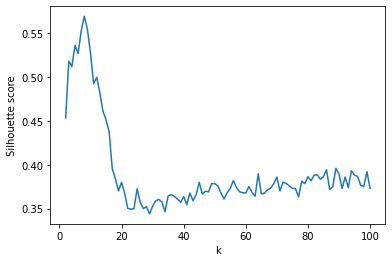

Najlepsza liczba: 8


In [16]:
plot_silhouette(KMeans, data, 101)

## Tworzenie drugiego modelu klasteryzacji - k-medoids

In [17]:
from sklearn_extra.cluster import KMedoids

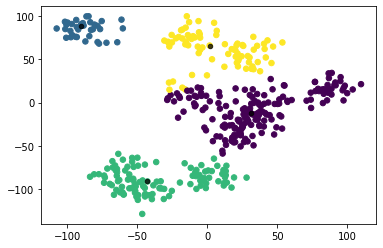

In [18]:
plot_clusters(KMedoids, data, 4)

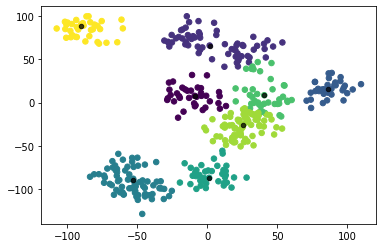

In [19]:
plot_clusters(KMedoids, data, 8)

### Sprawdzanie optymalnej liczby klastrów

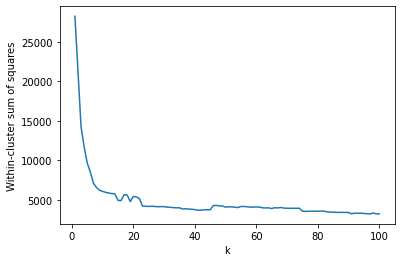

In [20]:
plot_elbow(KMedoids, data, 100)

??????????????????????????????????????????????????????

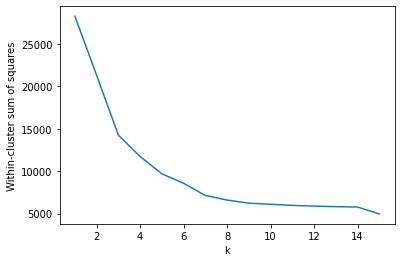

In [21]:
plot_elbow(KMedoids, data, 15)

Całkiem dziwny wyszedł duży wykres, ale dla mniejszego nadal przy około 10 klastrach jest dopiero znaczące spowolnienie zmniejszania się sumy.

### Metoda silhouette

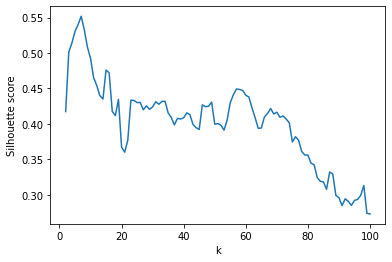

Najlepsza liczba: 7


In [22]:
plot_silhouette(KMedoids, data, 101)

???????????????????

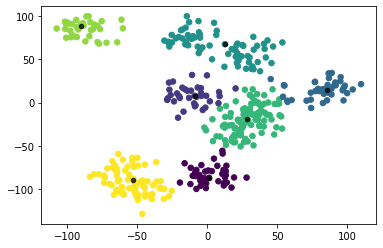

In [23]:
plot_clusters(KMedoids, data, 7)

W sumie, rzeczywiście 7 klastrów ma sens.